In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Dados Experimentais

Dados extraídos do artigo original. É dito que o SCO acontece de um estado s = 0 (LS) para s = 2 (HS) e que a variação de volume é 48 $\pm$ 4 A³. A variação de pressão

In [28]:
delta_S_p2_rev_comp = pd.read_csv("delta_S_p2_rev_comp.csv",header = None).rename(columns={0:"T(K)",1:"DS(J/kgK)"})
delta_S_p2_rev_decomp = pd.read_csv("delta_S_p2_rev_decomp.csv",header = None).rename(columns={0:"T(K)",1:"DS(J/kgK)"})
delta_S_p2_comp = pd.read_csv("delta_S_p2_comp.csv",header = None).rename(columns={0:"T(K)",1:"DS(J/kgK)"})
delta_S_p2_decomp = pd.read_csv("delta_S_p2_decomp.csv",header = None).rename(columns={0:"T(K)",1:"DS(J/kgK)"})

<>:8: SyntaxWarning: invalid escape sequence '\D'
<>:8: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_6454/3286404056.py:8: SyntaxWarning: invalid escape sequence '\D'
  plt.ylabel("$\Delta$ S (J/Kg$\cdot$K)")


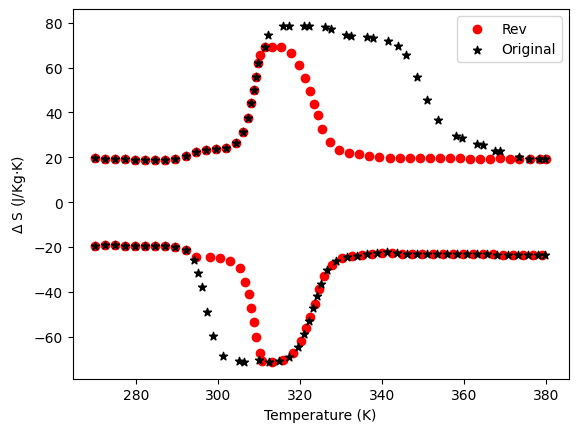

In [50]:
plt.scatter(delta_S_p2_rev_comp['T(K)'],delta_S_p2_rev_comp['DS(J/kgK)'],color = 'red',label='Rev')
plt.scatter(delta_S_p2_rev_decomp['T(K)'],delta_S_p2_rev_decomp['DS(J/kgK)'],color='red')

plt.scatter(delta_S_p2_comp['T(K)'],delta_S_p2_comp['DS(J/kgK)'],color='black',marker='*',label='Original')
plt.scatter(delta_S_p2_decomp['T(K)'],delta_S_p2_decomp['DS(J/kgK)'],color='black',marker='*')

plt.xlabel("Temperature (K)")
plt.ylabel("$\Delta$ S (J/Kg$\cdot$K)")

plt.legend()
plt.show()

# Fração de Moléculas HS

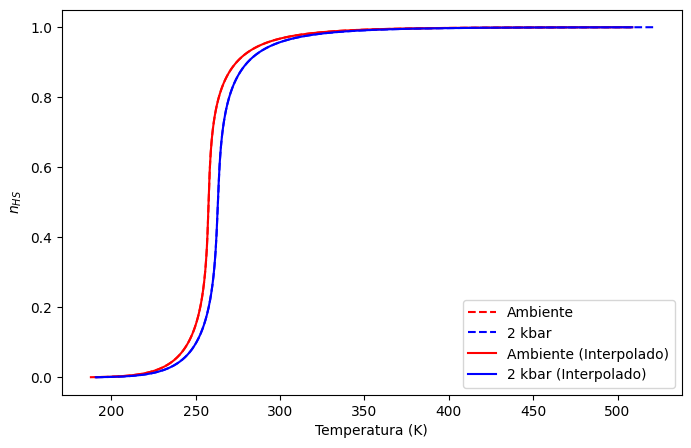

In [4]:
# Parâmetros
g = 862 # Adimensional
T_0 = 236 # Em Kelvin
#T_0 = 262
Delta_0 = 1741 # Em Kelvin
delta_V = 48e-30 # A unidade dá em metros ao cubo.
k_B = 1.380649e-23 # Em J/K

def T(m, delta_0, delta_V, P, g, T0):
#    P_linha = (((delta_V)**(1/3)) * P) / 4
    P_linha = (((delta_V) * P)) / 4
    #gamma = (k_B * delta_0 + P_linha * (delta_V**3)) / (k_B * T0)
    gamma = (delta_0 + P_linha/k_B) / (T0)
    numerator = 2 * (m - gamma)
    denominator = np.log((m + 1) / (g**2 * (1 - m)))
    return T0 * (numerator / denominator)

# Varredura original em m
m_amb = np.linspace(-0.999, 0.999, 10000)
m_2kbar = np.linspace(-0.999, 0.999, 10000)

Temp_amb = T(m_amb, Delta_0, delta_V, 101325, g, T_0)
Temp_2kbar = T(m_2kbar, Delta_0, delta_V, 43e6, g, T_0)

n_hs_amb = (m_amb + 1) / 2
n_hs_2kbar = (m_2kbar + 1) / 2

# Define um grid comum de temperatura (exemplo: de 1K a 300K)
T_min = max(np.min(Temp_amb), np.min(Temp_2kbar))
T_max = min(np.max(Temp_amb), np.max(Temp_2kbar))
T_common = np.linspace(T_min, T_max, 1000)

# Interpolação para obter n_hs em T_common
n_hs_amb_interp = np.interp(T_common, Temp_amb, n_hs_amb)
n_hs_2kbar_interp = np.interp(T_common, Temp_2kbar, n_hs_2kbar)

m_amb = np.linspace(-0.999, 0.999, 10000)
m_2kbar = np.linspace(-0.999, 0.999, 10000)

Temp_amb = T(m_amb, Delta_0, delta_V, 101325, g, T_0)
Temp_2kbar = T(m_2kbar, Delta_0, delta_V, 43e6, g, T_0)
n_hs_amb = (m_amb + 1) / 2
n_hs_2kbar = (m_2kbar + 1) / 2


# Plot
plt.figure(figsize=(8,5))

plt.plot(Temp_amb, n_hs_amb, label='Ambiente',linestyle='--',color='red')
plt.plot(Temp_2kbar, n_hs_2kbar, label='2 kbar',linestyle='--',color='blue')

plt.plot(T_common, n_hs_amb_interp, label='Ambiente (Interpolado)',color='red')
plt.plot(T_common, n_hs_2kbar_interp, label='2 kbar (Interpolado)',color='blue')


plt.xlabel('Temperatura (K)')
plt.ylabel(r'$n_{HS}$')
plt.legend()
plt.show()